# 0.0 Imports

In [1]:
import pickle
import pandas   as pd
import numpy    as np

from sklearn import preprocessing as pp

import funcoes_suporte as fs

## 0.1 Help functions

In [2]:
fs.jupyter_settings(fonte = 8)
fs.supressao_notacao(casa_decimal=2)

## 0.2 Load interim data

In [3]:
x_treino = pickle.load( open( "../data/interim/x_treino_fe.pkl", "rb" ) )
y_treino = pickle.load( open("../data/interim/y_treino.pkl", "rb"))
df = x_treino.copy()
df['resposta'] = y_treino.values
df.head()

,id,genero,idade,codigo_regiao,contato_cliente,cnh,idade_veiculo,veiculo_danificado,seguro_previo_automovel,premio_anual,cliente_dias_contrato,idade_class_etaria,premio_anual_cat,semanas_contrato,meses_contrato,resposta
55914,55915,Male,33,29.00,124.00,1,2,1,0,26761.00,139,1,2,19.86,4.63,0
179876,179877,Male,55,28.00,26.00,1,3,1,0,27875.00,285,2,2,40.71,9.50,1
300095,300096,Female,26,28.00,152.00,1,1,0,1,43562.00,118,1,2,16.86,3.93,0
60078,60079,Male,57,38.00,124.00,1,2,0,1,51365.00,249,2,3,35.57,8.30,0
312426,312427,Male,27,42.00,152.00,1,1,1,0,26590.00,161,1,2,23.00,5.37,0


In [4]:
del x_treino, y_treino

# 1.0 Data Preparation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266776 entries, 55914 to 121958
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       266776 non-null  int64  
 1   genero                   266776 non-null  object 
 2   idade                    266776 non-null  int64  
 3   codigo_regiao            266776 non-null  float64
 4   contato_cliente          266776 non-null  float64
 5   cnh                      266776 non-null  int64  
 6   idade_veiculo            266776 non-null  int64  
 7   veiculo_danificado       266776 non-null  int64  
 8   seguro_previo_automovel  266776 non-null  int64  
 9   premio_anual             266776 non-null  float64
 10  cliente_dias_contrato    266776 non-null  int64  
 11  idade_class_etaria       266776 non-null  int64  
 12  premio_anual_cat         266776 non-null  int64  
 13  semanas_contrato         266776 non-null  float64
 14  meses

In [6]:
fs.estatistica_descritiva(df.select_dtypes(include=['int64','float64']))

,variaveis,minimo,maximo,range,media,mediana,desvio_padrao,iqr,assimetria,curtosis,cv
0,id,2.00,381108.00,381106.00,190548.26,190543.50,110059.96,190549.50,0.00,-1.20,0.58
1,idade,20.00,85.00,65.00,38.85,36.00,15.51,24.00,0.67,-0.57,0.40
2,codigo_regiao,0.00,52.00,52.00,26.41,28.00,13.21,20.00,-0.12,-0.86,0.50
3,contato_cliente,1.00,163.00,162.00,111.94,128.00,54.24,126.00,-0.90,-0.98,0.48
4,cnh,0.00,1.00,1.00,1.00,1.00,0.05,0.00,-21.41,456.56,0.05
5,idade_veiculo,1.00,3.00,2.00,1.61,2.00,0.57,1.00,0.25,-0.79,0.35
6,veiculo_danificado,0.00,1.00,1.00,0.51,1.00,0.50,1.00,-0.02,-2.00,0.99
7,seguro_previo_automovel,0.00,1.00,1.00,0.46,0.00,0.50,1.00,0.17,-1.97,1.09
8,premio_anual,2630.00,540165.00,537535.00,30580.22,31680.00,17260.71,15005.25,1.86,36.73,0.56
9,cliente_dias_contrato,10.00,299.00,289.00,154.28,154.00,83.67,145.00,0.00,-1.20,0.54


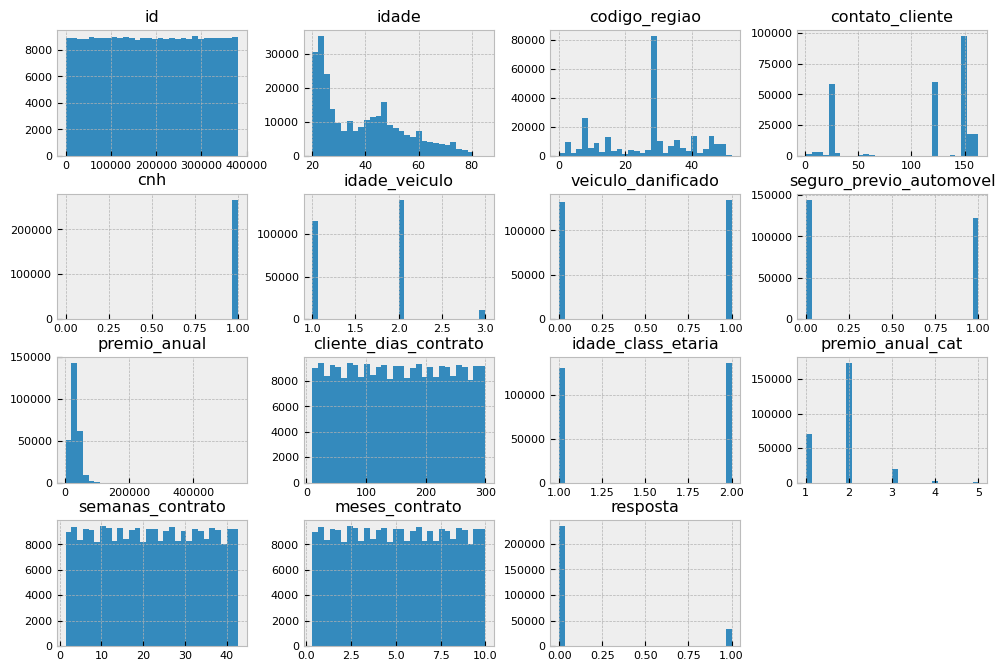

In [7]:
df.select_dtypes(include=['int64','float64']).hist(bins=30);

## 1.1 Normalização

In [8]:
df['premio_anual'] = np.log1p(df['premio_anual'])

## 1.2 Reescala

In [9]:
mms_pa = pp.MinMaxScaler()
df[['premio_anual']] = mms_pa.fit_transform( df[['premio_anual']].values )
pickle.dump(mms_pa,open('../src/features/mms_pa.pkl','wb'))

In [10]:
mms_idade = pp.MinMaxScaler()
df[['idade']] = mms_idade.fit_transform( df[['idade']].values )
pickle.dump( mms_idade, open('../src/features/mms_idade.pkl ','wb' ) )

In [11]:
mms_cdc = pp.MinMaxScaler()
df[['cliente_dias_contrato']] = mms_cdc.fit_transform( df[['cliente_dias_contrato']].values )
pickle.dump( mms_cdc, open('../src/features/mms_cdc.pkl','wb' ) )

In [12]:
mms_sc = pp.MinMaxScaler()
df[['semanas_contrato']] = mms_sc.fit_transform( df[['semanas_contrato']].values )
pickle.dump( mms_sc, open('../src/features/mms_sc.pkl','wb' ) )

In [13]:
mms_mc = pp.MinMaxScaler()
df[['meses_contrato']] = mms_mc.fit_transform( df[['meses_contrato']].values )
pickle.dump( mms_mc, open('../src/features/mms_mc.pkl','wb' ) )

## 1.3 Encoder

In [14]:
# genero - OneHotEncoder / TargetEncoder
target_encode_genero = df.groupby(['genero'])['resposta'].mean()
df.loc[:, 'genero'] = df['genero'].map(target_encode_genero)
pickle.dump( target_encode_genero, open('../src/features/target_encode_genero.pkl', 'wb' ) )

In [15]:
# codigo_regiao -  One Hot Encoding / Frequency Encoding / Target Encoding / Weighted Target Encoding
target_encode_codigo_regiao = df.groupby(['codigo_regiao'])['resposta'].mean()
df.loc[:, 'codigo_regiao'] = df['codigo_regiao'].map(target_encode_codigo_regiao)
pickle.dump( target_encode_codigo_regiao, open('../src/features/target_encode_codigo_regiao.pkl', 'wb' ) )

In [16]:
# idade_veiculo - One Hot Encoding / Order Encoding / Frequency Encoding
df = pd.get_dummies(df, prefix=['idade_veiculo'], columns=['idade_veiculo'])

In [17]:
# contato_cliente - Target Encoding / Frequency Encoding
fe_contato_cliente = df.groupby(['contato_cliente']).size() / len(df)
df.loc[:, 'contato_cliente'] = df['contato_cliente'].map(fe_contato_cliente)
pickle.dump( fe_contato_cliente , open('../src/features/fe_contato_cliente.pkl', 'wb' ) )

## 1.4 Transofrmação

## 1.5 Conferência Final

In [18]:
fs.estatistica_descritiva(df.select_dtypes(include=['int64','float64']))

,variaveis,minimo,maximo,range,media,mediana,desvio_padrao,iqr,assimetria,curtosis,cv
0,id,2.00,381108.00,381106.00,190548.26,190543.50,110059.96,190549.50,0.00,-1.20,0.58
1,idade,0.00,1.00,1.00,0.29,0.25,0.24,0.37,0.67,-0.57,0.82
2,codigo_regiao,0.03,0.20,0.16,0.12,0.11,0.05,0.10,0.40,-1.28,0.37
3,contato_cliente,0.00,0.35,0.35,0.21,0.21,0.13,0.16,-0.35,-1.13,0.59
4,cnh,0.00,1.00,1.00,1.00,1.00,0.05,0.00,-21.41,456.56,0.05
5,veiculo_danificado,0.00,1.00,1.00,0.51,1.00,0.50,1.00,-0.02,-2.00,0.99
6,seguro_previo_automovel,0.00,1.00,1.00,0.46,0.00,0.50,1.00,0.17,-1.97,1.09
7,premio_anual,0.00,1.00,1.00,0.40,0.47,0.19,0.09,-1.47,0.65,0.47
8,cliente_dias_contrato,0.00,1.00,1.00,0.50,0.50,0.29,0.50,0.00,-1.20,0.58
9,idade_class_etaria,1.00,2.00,1.00,1.51,2.00,0.50,1.00,-0.04,-2.00,0.33


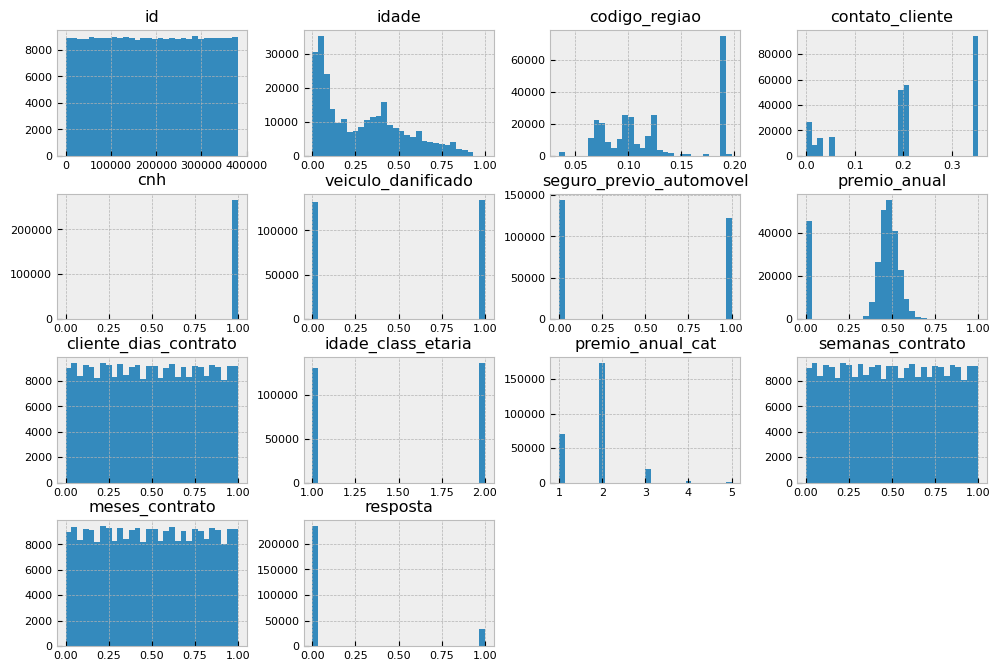

In [19]:
df.select_dtypes(include=['int64','float64']).hist(bins=30);

# 2.0 Export Pickle interim Data

In [20]:
# x_treino
x_treino = df.drop(columns = ['resposta'],  axis=1 ).reset_index(drop=True)
pickle.dump(x_treino,open('../data/interim/x_treino_dp.pkl','wb'))

# y_treino
y_treino = df['resposta'].copy()
pickle.dump(y_treino,open('../data/interim/y_treino_dp.pkl','wb'))

In [21]:
#del df, x_treino, y_treino